# contexto
No Airbnb, qualquer pessoa que tenha um quarto ou um imóvel de qualquer tipo, (apartamento, casa, chalé, pousada, etc.) pode ofertar o seu imóvel para ser alugado por diária.

Você cria o seu perfil de host (pessoa que disponibiliza um imóvel para aluguel por diária e e cria o anuncio do seu imóvel.

Nesse anúncio, o host deve descrever as caracteristicas do imóvel da forma mais completa possível, de forma a ajudar os locadores/viajantes a escolherem o melhor imóvel apra eles ( e de forma a tornar o seu anúncio mais atrativo)

Existem dezenas de personificações possíveis no seu anúncio, desde quantidade mínima de diária, preço, quantidade de quartos, até regras de cancelamento, taxas extras paras hóspedes extras, exigência de verificação de identidade do locador, etc.

Nosso Objetivo
Construir um modelo de prvisão de preço que permita uma pessoa comum que possui um imóvel, possa saber quanto deve cobrar pela diária do seu imovel.

Ou ainda, para o locador comum, dado o imóvel que ele está buscando, ajudar a saber se aquele imóvel está com preço atrativo (abaixo da média de imóveis com as mesmas caracteristicas) ou não.

o que temos disponíveis, inspirações e cretido
As bases de dados foram retiradas do site kaggle : link ...

As basese de dados são os preços dos imóveis obtidos e suas respectivas caracteristica em cada mês
Os preços são dados em reais (R$)
Temos bases de abril de 2018 a maio de 2020, com exceção de junho de 2018 que não possui base de dados.
Expectativas Iniciais
Acredito que a sazonalidade pode ser um fator importante, visto que meses como dezembro costumam ser bem caros no RJ
A localização do imóvel deve fazer muita diferença no prço, ja que no rio de janeiro a lcoalização pode mudar completamente as careacetisticas do lugar (segurança, beleza natual, pontos turísticos)
Adionais/Comodiades podem ter impactos significativos, visot que temos muitos prédios e casas antigas no Rio de Jeneiro
Vamos descobrir o quanto esses fatores impactam e se temos outros não tão intuitivos que são importantes.

# importação das Bibliotecas e Base de dados

In [28]:
import pandas as pd
import pathlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
caminho_bases = pathlib.Path(r'C:\Users\Samsung\Desktop\datasets\Airbnb-rio')

meses = {'jan': 1, 'fev': 2, 'mar': 3, 'abr': 4, 'mai': 5, 'jun': 6, 'jul': 7, 'ago': 8, 'set': 9, 'out': 10, 'nov': 11, 'dez': 12}

base_airbnb_df = []

try:
    for arquivo in caminho_bases.iterdir():
        nome_mes = arquivo.name[:3]
        mes = meses.get(nome_mes, None)
        
        ano = arquivo.name[-8:-4]
        ano = int(ano)
                 
        df = pd.read_csv(caminho_bases / arquivo.name, low_memory=False)
        df['ano'] = ano
        df['mes'] = mes

        base_airbnb_df.append(df)
        
    # Concatena todos os DataFrames armazenados na lista base_airbnb_df
    base_airbnb_df = pd.concat(base_airbnb_df, ignore_index=True)
            
except Exception as err:
    print(err)
else:
    print('Arquivo lido com sucesso')

display(base_airbnb_df)


Arquivo lido com sucesso


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,14063,https://www.airbnb.com/rooms/14063,20180414160018,2018-04-14,Living in a Postcard,"Besides the most iconic's view, our apartment ...",NaN,"Besides the most iconic's view, our apartment ...",none,Best and favorite neighborhood of Rio. Perfect...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17878,https://www.airbnb.com/rooms/17878,20180414160018,2018-04-14,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for New Y...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for New Y...,none,This is the best spot in Rio. Everything happe...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24480,https://www.airbnb.com/rooms/24480,20180414160018,2018-04-14,Nice and cozy near Ipanema Beach,My studio is located in the best of Ipanema. ...,The studio is located at Vinicius de Moraes St...,My studio is located in the best of Ipanema. ...,none,"The beach, the lagoon, Ipanema is a great loca...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25026,https://www.airbnb.com/rooms/25026,20180414160018,2018-04-14,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31560,https://www.airbnb.com/rooms/31560,20180414160018,2018-04-14,NICE & COZY 1BDR - IPANEMA BEACH,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,none,Die Nachbarschaft von Ipanema ist super lebend...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902205,38844730,https://www.airbnb.com/rooms/38844730,20190923212307,2019-09-24,TRANSAMERICA BARRA DA TIJUCA R IV,"Em estilo contemporâneo, o Transamerica Prime ...",NaN,"Em estilo contemporâneo, o Transamerica Prime ...",none,NaN,...,1.0,1.0,1125.0,1125.0,1.0,1125.0,0.0,15.0,0.0,0.0
902206,38846408,https://www.airbnb.com/rooms/38846408,20190923212307,2019-09-24,Alugo para o Rock in Rio,"Confortável apartamento, 2 quartos , sendo 1 s...",O apartamento estará com mobília completa disp...,"Confortável apartamento, 2 quartos , sendo 1 s...",none,"Muito próximo ao Parque Olímpico, local do eve...",...,2.0,2.0,1125.0,1125.0,2.0,1125.0,0.0,1.0,0.0,0.0
902207,38846703,https://www.airbnb.com/rooms/38846703,20190923212307,2019-09-24,Apt COMPLETO em COPACABANA c/TOTAL SEGURANÇA,Apartamento quarto e sala COMPLETO para curtas...,Espaço ideal para até 5 pessoas. Cama de casal...,Apartamento quarto e sala COMPLETO para curtas...,none,NaN,...,3.0,3.0,1125.0,1125.0,3.0,1125.0,0.0,23.0,6.0,0.0
902208,38847050,https://www.airbnb.com/rooms/38847050,20190923212307,2019-09-24,Cobertura Cinematografica,Cobertura alto nivel,NaN,Cobertura alto nivel,none,NaN,...,1.0,1.0,1125.0,1125.0,1.0,1125.0,0.0,1.0,0.0,0.0


- como temos muitas colunas nosso modelo pode acabar fianco muito lento
- Além disso uma análise rápida permite ver que várias colunas não são necessárias para o nosso modelo de previsão, por isso, vamos excluir algumas colunas.
- tipos de colunas que vamos excluir:
  1. ids, links e informações não relevantes
  2.
  3.
  4.

  - para isso vamos criar um arquivo em excel com os 1000 primeiros registros e fazer uma análise qualitativa

In [4]:
print(list(base_airbnb_df.columns))

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

In [6]:
base_airbnb_df.head(1000).to_csv('primeiros_registros.csv',sep=';')

##Depois da analise qualitativa das colunas, levando em conta os critérios explicados acima, ficamos com as seguintes colunas:

In [16]:
colunas = ['host_response_time','host_response_rate','host_is_superhost','host_listings_count','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','is_business_travel_ready','cancellation_policy','ano','mes']

base_airbnb_df = base_airbnb_df.loc[:,colunas] 

display(base_airbnb_df)

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,ano,mes
0,NaN,NaN,f,1.0,-22.946854,-43.182737,Apartment,Entire home/apt,4,1.0,...,9.0,9.0,9.0,9.0,9.0,f,f,strict_14_with_grace_period,2018,4
1,within an hour,100%,t,2.0,-22.965919,-43.178962,Condominium,Entire home/apt,5,1.0,...,9.0,10.0,10.0,9.0,9.0,t,f,strict,2018,4
2,within an hour,100%,f,1.0,-22.985698,-43.201935,Apartment,Entire home/apt,2,1.0,...,10.0,10.0,10.0,10.0,9.0,f,f,strict,2018,4
3,within an hour,100%,f,3.0,-22.977117,-43.190454,Apartment,Entire home/apt,3,1.0,...,10.0,10.0,10.0,10.0,9.0,f,f,strict,2018,4
4,within an hour,100%,t,1.0,-22.983024,-43.214270,Apartment,Entire home/apt,3,1.0,...,10.0,10.0,10.0,10.0,9.0,t,f,strict,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902205,within an hour,93%,f,0.0,-23.003180,-43.342840,Apartment,Entire home/apt,4,1.0,...,NaN,NaN,NaN,NaN,NaN,f,f,flexible,2019,9
902206,NaN,NaN,f,0.0,-22.966640,-43.393450,Apartment,Entire home/apt,4,2.0,...,NaN,NaN,NaN,NaN,NaN,f,f,flexible,2019,9
902207,within a few hours,74%,f,32.0,-22.962080,-43.175520,Apartment,Entire home/apt,5,1.0,...,NaN,NaN,NaN,NaN,NaN,f,f,strict_14_with_grace_period,2019,9
902208,NaN,NaN,f,0.0,-23.003400,-43.341820,Apartment,Entire home/apt,4,1.0,...,NaN,NaN,NaN,NaN,NaN,f,f,strict_14_with_grace_period,2019,9


# Tratar Valores Nulos

- visualizando dos dados, percebemos que existe uma grande disparidade em dados faltantes. As colunas com mais de 300.000 valores NaN foram excluídas da análise
- Para as outras colunas, como temos muitos dados (mais de 900.000 linhas) vamos exluir as linhas que contém dados NaN.

In [20]:

for coluna in base_airbnb_df:
    if base_airbnb_df[coluna].isnull().sum() > 300000:
        base_airbnb_df = base_airbnb_df.drop(coluna, axis=1)
        
print(base_airbnb_df.isnull().sum())

host_is_superhost            460
host_listings_count          460
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                   1724
bedrooms                     850
beds                        2502
bed_type                       0
amenities                      0
price                          0
guests_included                0
extra_people                   0
minimum_nights                 0
maximum_nights                 0
number_of_reviews              0
instant_bookable               0
is_business_travel_ready       0
cancellation_policy            0
ano                            0
mes                            0
dtype: int64


In [23]:
#exlui as linhas NaN
base_airbnb_df = base_airbnb_df.dropna()

print(base_airbnb_df.shape)
print(base_airbnb_df.isnull().sum())

(897709, 23)
host_is_superhost           0
host_listings_count         0
latitude                    0
longitude                   0
property_type               0
room_type                   0
accommodates                0
bathrooms                   0
bedrooms                    0
beds                        0
bed_type                    0
amenities                   0
price                       0
guests_included             0
extra_people                0
minimum_nights              0
maximum_nights              0
number_of_reviews           0
instant_bookable            0
is_business_travel_ready    0
cancellation_policy         0
ano                         0
mes                         0
dtype: int64


# tipos de dados

In [24]:
print(base_airbnb_df.dtypes)
print('-'*60)
print(base_airbnb_df.iloc[0])

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                        object
guests_included               int64
extra_people                 object
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object
------------------------------------------------------------
host_is_superhost                                                           f
host_listings_count

como o preço e extra people estão sendo reconhecidos como objeto (ao invés de ser um flaot) temos que mudar o tipo de variável da coluna.
(price, extra_people)

In [26]:
#price
base_airbnb_df['price'] = base_airbnb_df['price'].str.replace('$', '')
base_airbnb_df['price'] = base_airbnb_df['price'].str.replace(',', '')
base_airbnb_df['price'] = base_airbnb_df['price'].astype(np.float32, copy=False)

#extra_people
base_airbnb_df['extra_people'] = base_airbnb_df['extra_people'].str.replace('$', '')
base_airbnb_df['extra_people'] = base_airbnb_df['extra_people'].str.replace(',', '')
base_airbnb_df['extra_people'] = base_airbnb_df['extra_people'].astype(np.float32, copy=False)

#verificando os tipos
print(base_airbnb_df.dtypes)

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                       float32
guests_included               int64
extra_people                float32
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object


# Análise Exploratória

vamos basicamente olhar feature por feature para:
 1. Ver a correlação entre as features e decidir se manteremos todas as features que temos.
 2. Excluir outiliers (usaremos como regra, valores abaixo Q1 - 1.5xAmplitude e valores acima Q3+1.5xAmplitede), Aplitude = Q3 - Q1.
 3. Confirmar se todas as features que temos fazem realmente sentido para o nosso modelo ou se alguma delas não vai ajudar e se devemos excluir

Vamos começar pelas colunas de preço (resultado final que queremos) e de extra_people (também valor monetário). Esses são os valores numéricos contínuos.
Depois vamos analisar as coluna de valores numéricos discretos (accomodates, badrooms, guests_included, etc.)
Por fim, vamos avaliar as colunas de textos e definir quais categorias fazem sentido mantermos ou não.

<Axes: >

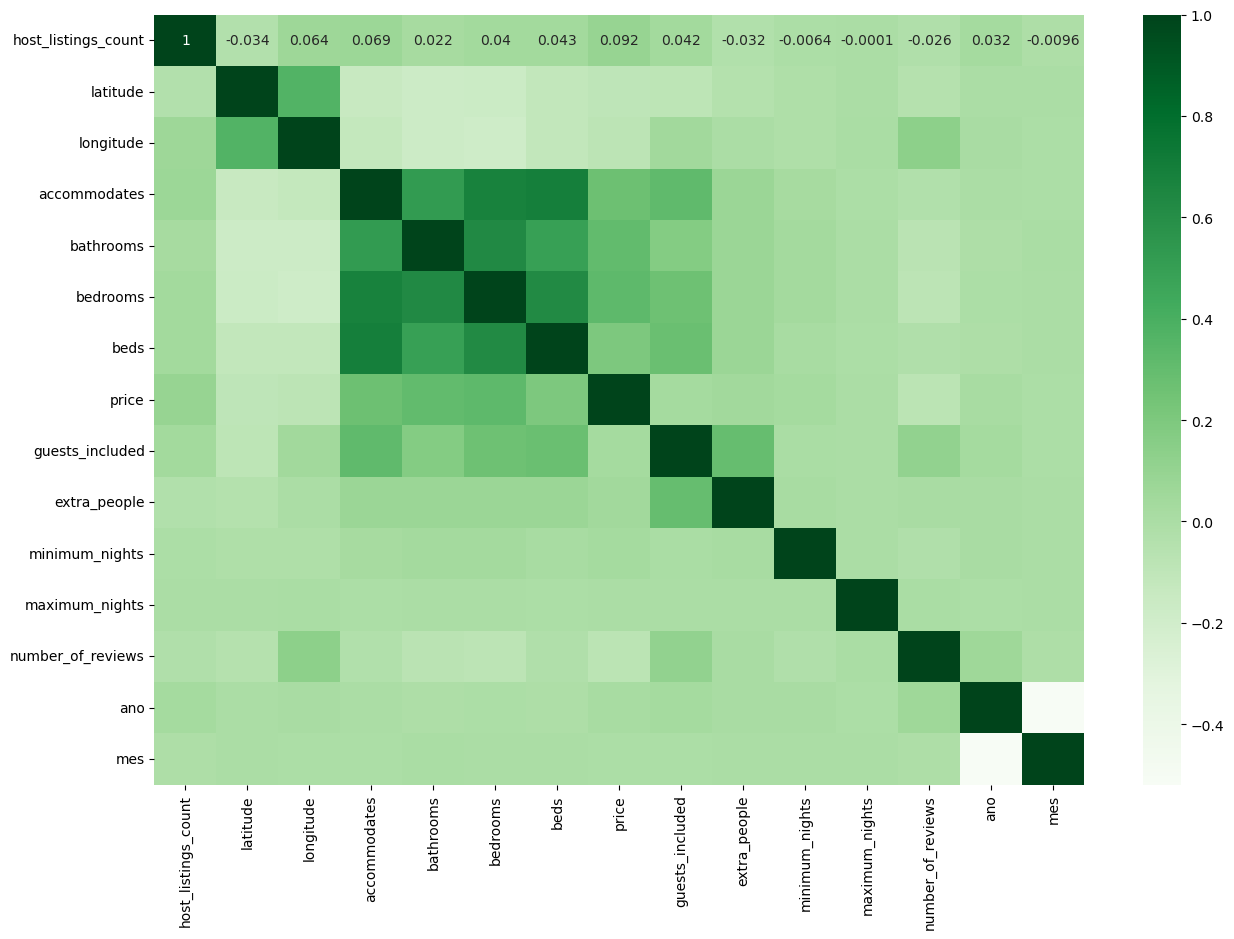

In [56]:
numeric_df = base_airbnb_df.select_dtypes(include=['float64', 'int64', 'float32'])
plt.figure(figsize=(15,10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Greens', annot_kws={"size": 10})


# Definição de Funções para Análise de Outiliers
vamos definir algumas funções para ajudar na análise de outiliers das colunas

In [68]:
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude

In [105]:
def diagrama_caixa(coluna):
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(15,5)
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna, ax=ax2)

def histograma(coluna):
    plt.figure(figsize=(10,5))
    sns.histplot(coluna, kde=True)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


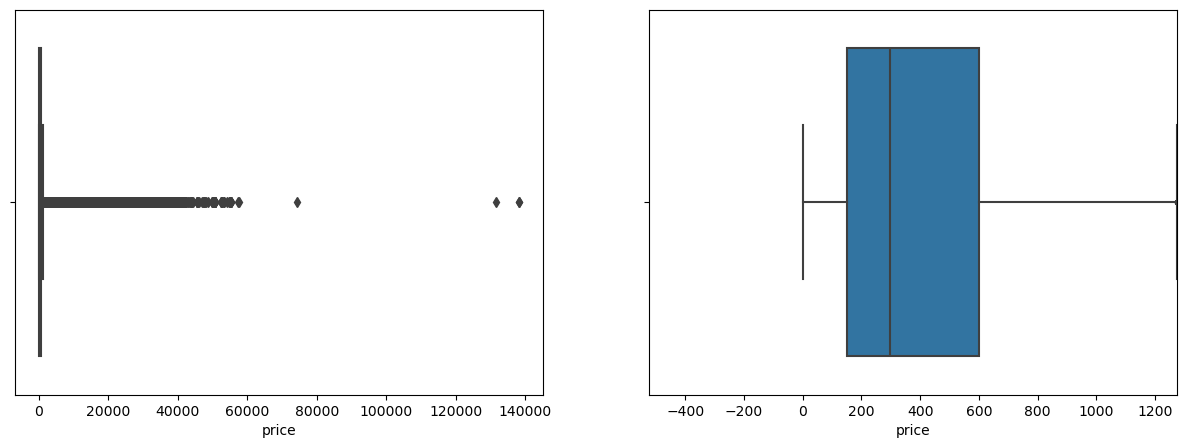

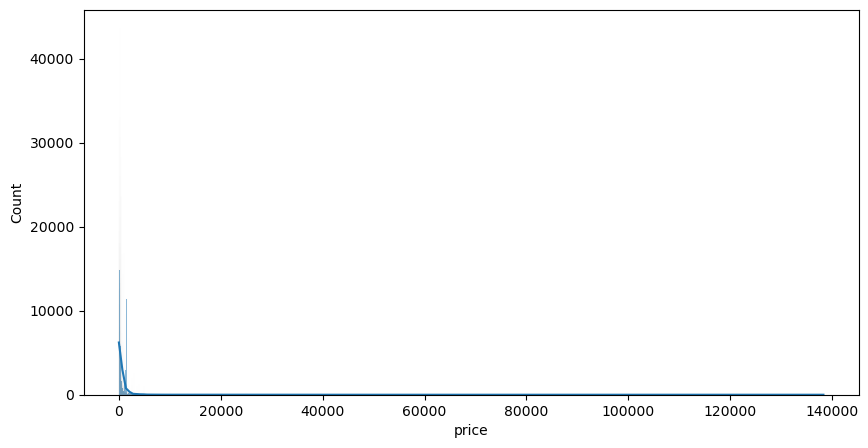

In [106]:
diagrama_caixa(base_airbnb_df['price'])
histograma(base_airbnb_df['price'])


# Enconding
    2. Ajustar 